In [2]:
try:
    import pandas as pd
except ImportError:
    print("Pandas not installed")
    %pip install pandas --user

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib not installed")
    %pip install matplotlib --user

import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2025/refs/heads/main/qatar.csv"

# Leer datos del archivo
mundial : pd.DataFrame = pd.read_csv(archivo)
mundial


,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,0,1,6,5,0,0,52,72,256,279
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,0,1,8,13,0,0,63,72,139,416
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,0,0,9,15,0,0,63,73,263,251
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,0,1,7,7,0,0,81,72,242,292
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1,0,9,15,0,0,49,54,193,308
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,1,0,12,10,0,0,85,63,321,260
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,0,0,13,14,0,0,72,47,328,218
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,0,0,7,14,0,0,75,72,288,277


In [9]:
#Cuantos Partidos Jugados
Partidos = mundial['match_no']
len(Partidos)

64

In [12]:
#Selecciones que participaron
Selecciones = pd.concat([mundial["1"], mundial["2"]])
Selecciones = Selecciones.unique()
Selecciones

array(['QATAR', 'ENGLAND', 'SENEGAL', 'UNITED STATES', 'ARGENTINA',
       'DENMARK', 'MEXICO', 'FRANCE', 'MOROCCO', 'GERMANY', 'SPAIN',
       'BELGIUM', 'SWITZERLAND', 'URUGUAY', 'PORTUGAL', 'BRAZIL', 'WALES',
       'NETHERLANDS', 'TUNISIA', 'POLAND', 'JAPAN', 'CROATIA', 'CAMEROON',
       'KOREA REPUBLIC', 'ECUADOR', 'IRAN', 'AUSTRALIA', 'SAUDI ARABIA',
       'CANADA', 'COSTA RICA', 'GHANA', 'SERBIA'], dtype=object)

In [72]:
#Cuantas fases 
Fases = mundial["group"].unique()
FasesTotales = set()
for fase in Fases:
    if fase.startswith("Group"):
        FasesTotales.add("FaseDeGrupos")
    else:
        FasesTotales.add(fase)
len(FasesTotales)

6

In [50]:
#attendance promedio por partido
Attendance = int(mundial["attendance"].sum()) / len(Partidos)
Attendance

53191.4375

In [ ]:
#Partido con mas diferencia de goles
goles = abs(mundial["1_goals"] - mundial["2_goals"])
Golesmaximos = goles.idxmax()
Partido = mundial.loc[Golesmaximos]
print(Partido["1"] + " contra "  + Partido["2"])

10

In [ ]:
#Seleccion con mas penales metidos
SeleccionConMasPenales = {}
for selecciones in Selecciones:
    penalesTotales = 0
    for i in range(2):
        columna_equipo = str(i + 1)
        columna_penales = columna_equipo + "_panelties_scored"
        partidos = mundial[mundial[columna_equipo] == selecciones]
        penalesTotales += int(partidos[columna_penales].sum())
        
    SeleccionConMasPenales[selecciones] = penalesTotales
print(max(SeleccionConMasPenales, key=SeleccionConMasPenales.get))


In [148]:
#Seleccion que mas penales le hicieron
SeleccionConMasPenalesComidos = {}
for selecciones in Selecciones:
    PenalesRecibidos = 0
    for i in range(2):
        columna_equipo = str(i + 1)
        equipo_rival = "1" if columna_equipo == "2" else "2"
        columna_penales = equipo_rival + "_panelties_scored"

        partidos = mundial[mundial[columna_equipo] == selecciones]
        PenalesRecibidos += int(partidos[columna_penales].sum())
           
    SeleccionConMasPenalesComidos[selecciones] = PenalesRecibidos
print(max(SeleccionConMasPenalesComidos, key=SeleccionConMasPenalesComidos.get))

FRANCE


In [21]:
equipo : str = "ARGENTINA"

In [ ]:
# Seleccionar todos los partidos que jugo el equipo de "local"
# Completar

filtroLocal : pd.Series = mundial[mundial["1"] == equipo]
filtroLocal

In [82]:
# Seleccionar todos los partidos que jugo el equipo de "visitante"
# Completar

filtroVisitante : pd.Series = mundial[mundial["2"] == equipo]
filtroVisitante

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
38,39,Wed,30-Nov-22,20:00,Lusail Iconic Stadium,Michael Oliver,Group C,POLAND,ARGENTINA,84985,...,0,0,25,4,0,0,67,48,438,141
57,58,Fri,9-Dec-22,20:00,Lusail Iconic Stadium,Antonio Mateu Lahoz,Quarter-final,NETHERLANDS,ARGENTINA,88235,...,0,1,15,5,0,0,91,79,401,323


In [ ]:
# Seleccionar todos los partidos que jugo el equipo (de "local" o "visitante")
# Completar
filtroVisitanteoLocal : pd.Series = mundial[(mundial["1"] == equipo) |(mundial["2"] == equipo)]
filtroVisitanteoLocal

In [ ]:
# Cuantos goles hizo el equipo en total (obtener los goles metidos de local y sumarlos con los goles metidos de visitante)
# Completar
goles : int = pd.concat([filtroLocal["1_goals"], filtroVisitante["2_goals"]])
goles.sum()

np.int64(15)

In [90]:
# Cuantos goles hizo el equipo en promedio
# Completar
golesTotales = goles.sum() / len(filtroVisitanteoLocal)
print(golesTotales)

2.142857142857143


In [ ]:
# Cuantos partidos gano el equipo
# Completar

ganados : int = pd.concat([
    filtroLocal[(filtroLocal["1_goals"] > filtroLocal["2_goals"])],
    filtroVisitante[(filtroVisitante["2_goals"] > filtroVisitante["1_goals"])]
])
len(ganados)
#osea no pero como no hay un dato para saber el ganador sin contar los goles

4

Text(0, 0.5, 'Goles')

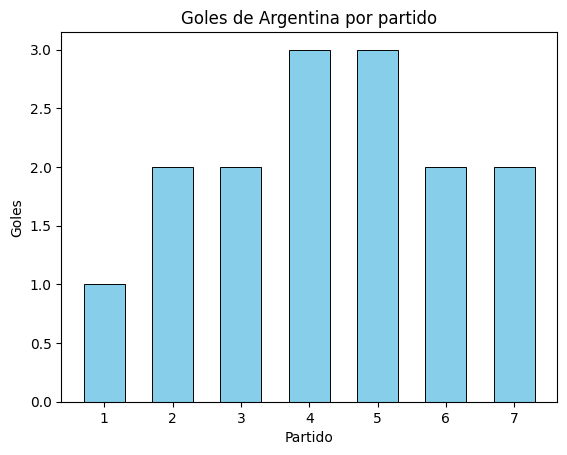

In [110]:
# Graficar los goles hechos por el equipo en cada partido
fig, ax = plt.subplots()
# Completar
x = range(1, len(goles) + 1)
y = goles

ax.bar(x, y, width=0.6, edgecolor="black", linewidth=0.7, color="skyblue")

# Etiquetas
ax.set_title("Goles de Argentina por partido")
ax.set_xlabel("Partido")
ax.set_ylabel("Goles")


In [21]:
# Contar cuantos goles hizo cada equipo en total en el mundial
# Completar
goles = []
equipos = Selecciones
for team in equipos:
    goles.append(int(mundial.loc[mundial["1"] == team, "1_goals"].sum() + mundial.loc[mundial["2"] == team, "2_goals"].sum()))

SeleccionesConGolesTotales = list(zip(equipos, goles))
SeleccionesConGolesTotales

[('QATAR', 1),
 ('ENGLAND', 13),
 ('SENEGAL', 5),
 ('UNITED STATES', 3),
 ('ARGENTINA', 15),
 ('DENMARK', 1),
 ('MEXICO', 2),
 ('FRANCE', 16),
 ('MOROCCO', 6),
 ('GERMANY', 6),
 ('SPAIN', 9),
 ('BELGIUM', 1),
 ('SWITZERLAND', 5),
 ('URUGUAY', 2),
 ('PORTUGAL', 12),
 ('BRAZIL', 8),
 ('WALES', 1),
 ('NETHERLANDS', 10),
 ('TUNISIA', 1),
 ('POLAND', 3),
 ('JAPAN', 5),
 ('CROATIA', 8),
 ('CAMEROON', 4),
 ('KOREA REPUBLIC', 5),
 ('ECUADOR', 4),
 ('IRAN', 4),
 ('AUSTRALIA', 4),
 ('SAUDI ARABIA', 3),
 ('CANADA', 2),
 ('COSTA RICA', 3),
 ('GHANA', 5),
 ('SERBIA', 5)]

Text(0, 0.5, 'Goles')

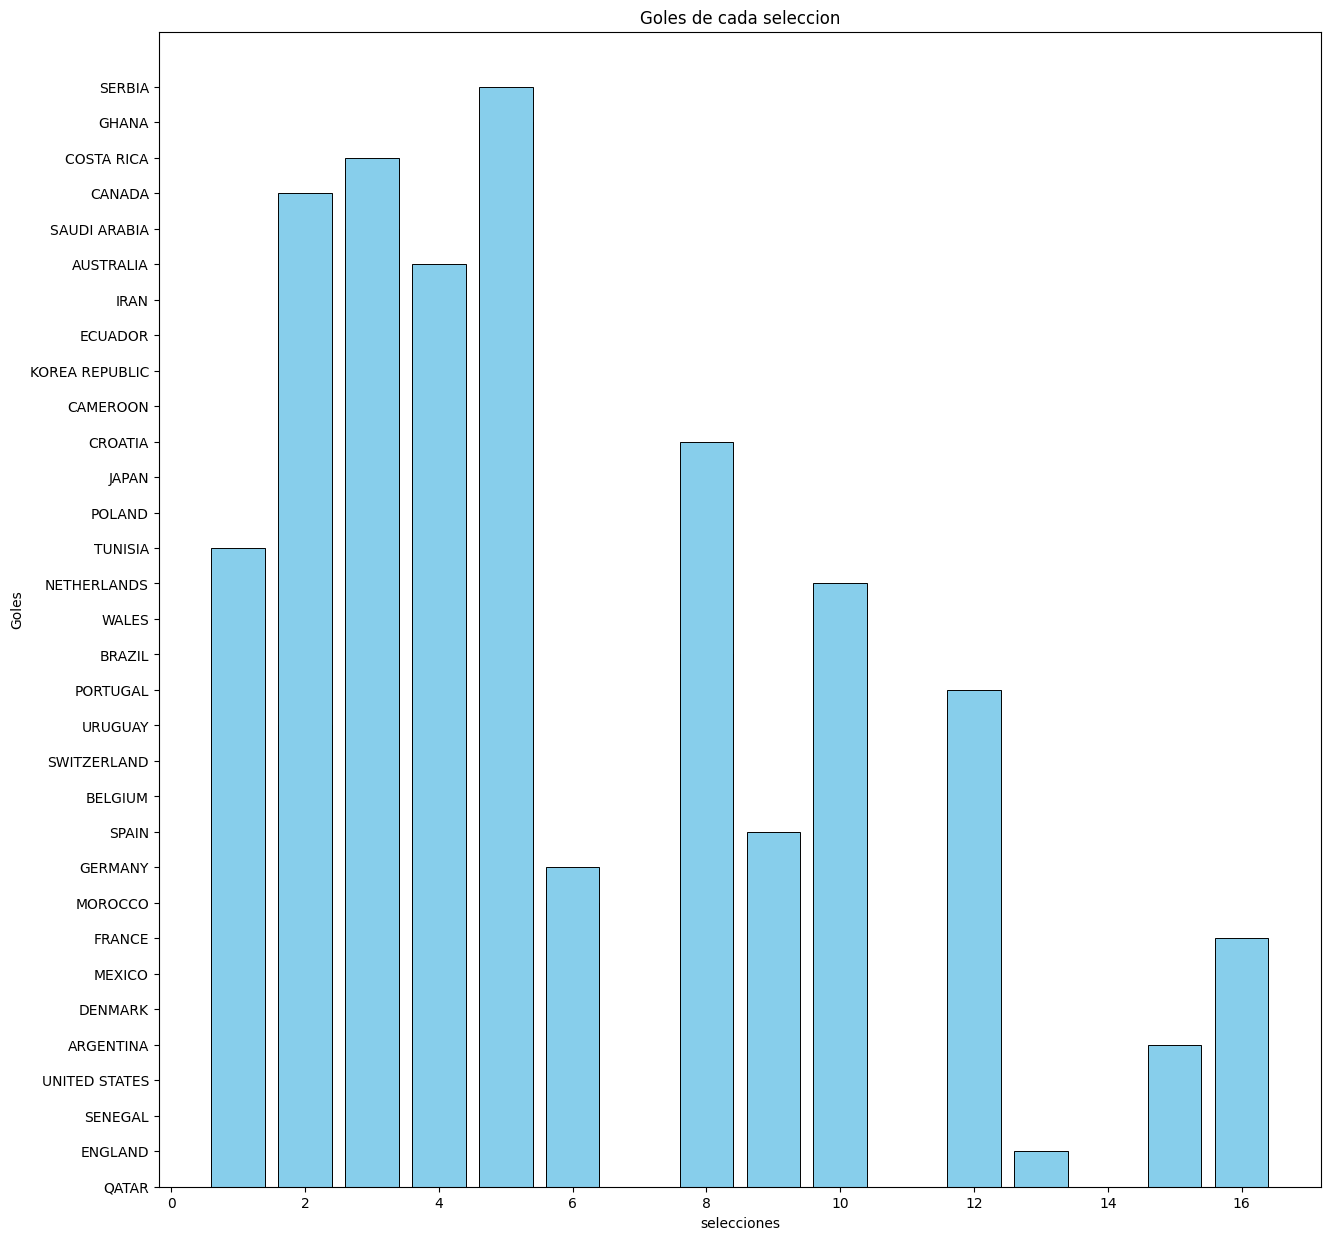

In [22]:
# Graficar los goles por equipo en todo el mundial

fig, ax = plt.subplots(figsize=(15, 15))
# Completar
x = [gols for equipos, gols in SeleccionesConGolesTotales]
y = [equipos for equipos, gols in SeleccionesConGolesTotales]

ax.bar(x, y, edgecolor="black", linewidth=0.7, color="skyblue")

# Etiquetas
ax.set_title("Goles de cada seleccion")
ax.set_xlabel("selecciones")
ax.set_ylabel("Goles")

In [23]:
# Cual es el equipo que hizo mas goles en el mundial?
# Completar
Pollo = max(SeleccionesConGolesTotales, key=lambda x: x[1])
print(Pollo[0])

FRANCE


In [29]:
# Por cada partido, cual fue la diferencia de goles?
# Completar
goles = abs(mundial["1_goals"] - mundial["2_goals"])
goles


0     2
1     4
2     2
3     0
4     1
     ..
59    1
60    3
61    2
62    1
63    0
Length: 64, dtype: int64

In [77]:
# En cada fase del mundial, cual fue el equipo que hizo mas goles?
# Completar

EquiposConMasGolesPorFase = []
EquiposPorFase = []
for fase in FasesTotales:
   for selecciones in Selecciones:
      if fase == "FaseDeGrupos":
         grupos = ["Group A", "Group B", "Group C", "Group D"]
         goles = int(mundial[(mundial["group"].isin(grupos)) & (mundial["1"] == selecciones)]["1_goals"].sum() + mundial[(mundial["group"].isin(grupos)) & (mundial["2"] == selecciones)]["2_goals"].sum())
      else: 
         goles = int(mundial[(mundial["group"] == fase) & (mundial["1"] == selecciones)]["1_goals"].sum() + mundial[(mundial["group"] == fase) & (mundial["2"] == selecciones)]["2_goals"].sum())

      EquiposPorFase.append({
               "fase": fase,
               "seleccion": selecciones,
               "goles": goles
         })   
   EquiposConMasGolesPorFase.append(max([x for x in EquiposPorFase if x["fase"] == fase], key=lambda x: x["goles"]))

EquiposConMasGolesPorFase


[{'fase': 'Play-off for third place', 'seleccion': 'CROATIA', 'goles': 2},
 {'fase': 'FaseDeGrupos', 'seleccion': 'ENGLAND', 'goles': 9},
 {'fase': 'Semi-Final', 'seleccion': 'ARGENTINA', 'goles': 3},
 {'fase': 'Quarter-final', 'seleccion': 'ARGENTINA', 'goles': 2},
 {'fase': 'Round of 16', 'seleccion': 'PORTUGAL', 'goles': 6},
 {'fase': 'Final', 'seleccion': 'ARGENTINA', 'goles': 3}]